<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Поиск-ошибок-в-данных,-аномалий-и-исправления." data-toc-modified-id="Поиск-ошибок-в-данных,-аномалий-и-исправления.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Поиск ошибок в данных, аномалий и исправления.</a></span></li><li><span><a href="#Изменение-типов-данных." data-toc-modified-id="Изменение-типов-данных.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изменение типов данных.</a></span></li></ul></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Удаление-дубликатов." data-toc-modified-id="Удаление-дубликатов.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление дубликатов.</a></span></li><li><span><a href="#Расчеты-и-округления" data-toc-modified-id="Расчеты-и-округления-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Расчеты и округления</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются" data-toc-modified-id="Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a href="#Cредняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Cредняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li></ul></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li></ul></div>

# Сравнение тарифов сотового оператора

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходим предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Описание тарифов**
* Тариф «Смарт»
    * Ежемесячная плата: 550 рублей
    * Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
        * минута разговора: 3 рубля
        * сообщение: 3 рубля
        * 1 Гб интернет-трафика: 200 рублей
* Тариф «Ультра»
    * Ежемесячная плата: 1950 рублей
    * Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
        * минута разговора: 1 рубль
        * сообщение: 1 рубль
        * 1 Гб интернет-трафика: 150 рублей

**Цель исследования** - проанализировать поведение клиентов и сделать вывод, какой тариф лучше.

**План исследования**:
1. Обзор данных, предобработка
2. Исследовательский анализ данных
3. Статистический анализ данных

## Обзор данных

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
from scipy import stats as st

try:
    df_calls = pd.read_csv('calls.csv', parse_dates=[1])
#    df_calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
    df_internet = pd.read_csv('internet.csv', parse_dates=[3])
    df_messages = pd.read_csv('messages.csv', parse_dates=[1])
    df_tariffs = pd.read_csv('tariffs.csv', )
#    df_users = pd.read_csv('users.csv', dtype={'user_id':np.int8, 'age':np.int8}, parse_dates=[2,6])
    df_users = pd.read_csv('users.csv', parse_dates=[2,6])
    
except:
    df_calls = pd.read_csv('/datasets/calls.csv', parse_dates=[1])
    df_internet = pd.read_csv('/datasets/internet.csv', parse_dates=[3])
    df_messages = pd.read_csv('/datasets/messages.csv', parse_dates=[1])
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
    df_users = pd.read_csv('/datasets/users.csv', parse_dates=[2,6])    

df_calls.info()
display(df_calls.head())
df_internet.info()
display(df_internet.head())
df_messages.info()
display(df_messages.head())

#Переименовываем, чтобы потом было проще объединять
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

df_tariffs.info()
display(df_tariffs)

df_users.info()
display(df_users)

df_internet.drop('Unnamed: 0',axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Заполнение пропусков

In [3]:
display(df_calls.isna().mean())
display(df_internet.isna().mean())
display(df_messages.isna().mean())
display(df_tariffs.isna().mean())
display(df_users.isna().mean())

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff                   0.0
dtype: float64

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

Пропусков в данных нет, кроме churn_date в таблице users. По условию задачи, если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Для удобства сравнения заполним их текущей датой

In [4]:
df_users.churn_date.fillna(date.today(), inplace=True)
display(df_users.isna().mean())

user_id       0.0
age           0.0
churn_date    0.0
city          0.0
first_name    0.0
last_name     0.0
reg_date      0.0
tariff        0.0
dtype: float64

### Поиск ошибок в данных, аномалий и исправления.
Подозрительно, что в колонке user_id есть отрицательные значения, но вряд ли это может считаться ошибкой


In [5]:
df_calls.user_id.unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

Проверим, чтобы не было случая, когда churn_date < reg_date. Это явно ошибка.

In [6]:
df_users.query('churn_date < reg_date')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


In [7]:
df_users['city'].value_counts().abs

<bound method NDFrame.abs of Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Архангельск         1
Иваново             1
Нижневартовск       1
Химки               1
Подольск            1
Name: city, Length: 76, dtype: int64>

In [8]:
#Проверка на неявные дубликаты
sorted(df_users['city'].unique())

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

Аномалий и неявных дубликатов не выявлено в данных

In [9]:
# Просто выборочно посмотрим на города
df_users['city'].sample(100)

74              Якутск
332             Москва
52     Санкт-Петербург
270      Нижневартовск
301          Махачкала
            ...       
209               Омск
419       Новороссийск
228    Нижний Новгород
265               Омск
323          Челябинск
Name: city, Length: 100, dtype: object

<AxesSubplot:>

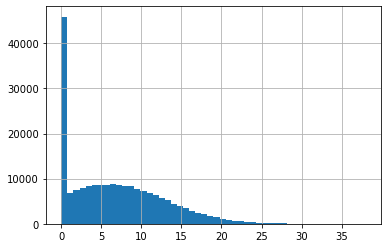

In [10]:
df_calls.duration.hist(bins=50)

<AxesSubplot:>

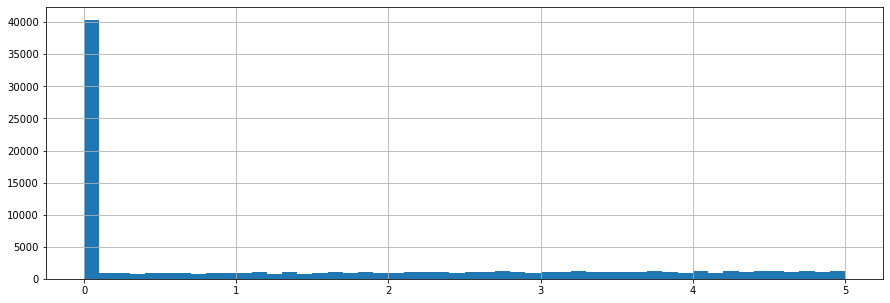

In [11]:
#Увеличим масштаб
df_calls.duration.hist(bins=50, range=(0,5), figsize=(15,5))

<AxesSubplot:>

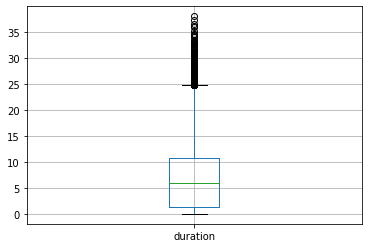

In [12]:
df_calls.boxplot('duration')

В распределении длительности звонков виден пик около нуля, что, кажется, не является ошибкой, т.к. звонок может прерваться моментально. Они явля
ются легитимными по условию задачи.
Есть аномальные длинные звонки в таблице df_calls (выбросы), они могут исказить статистику. Уберем звонки длиннее 25 минут.

In [13]:
#df_calls = df_calls[df_calls.duration < 25]

<AxesSubplot:>

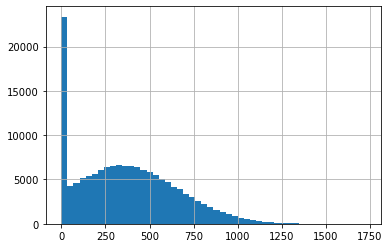

In [14]:
df_internet.mb_used.hist(bins=50)

<AxesSubplot:>

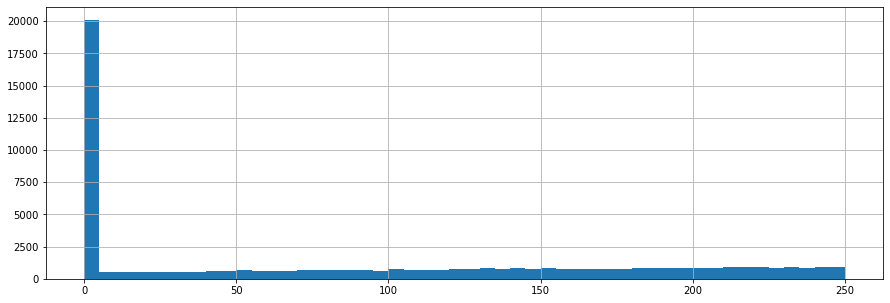

In [15]:
#Увеличим масштаб
df_internet.mb_used.hist(bins=50, range=(0,250), figsize=(15,5))

<AxesSubplot:>

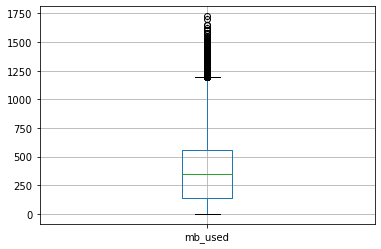

In [16]:
df_internet.boxplot('mb_used')

Есть аномальное большое количество потребления интернета, которое может исказить выводы. Уберем из выборки потребление выше 1250 Мб.

In [17]:
df_internet = df_internet[df_internet.mb_used < 1250]

### Изменение типов данных.
Нужные типы установлены на этапе чтения файла


## Предобработка данных.

### Удаление дубликатов.
Можно удалить только явные, т.к. неявных здесь быть не может

In [18]:
df_calls.drop_duplicates(inplace=True)
df_internet.drop_duplicates(inplace=True)
df_messages.drop_duplicates(inplace=True)

### Расчеты и округления

Посчитайте для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [19]:
#Проверка периода
display("Date period in calls dataset: " + df_calls.call_date.min().strftime("%m/%d/%Y") + " - " + df_calls.call_date.max().strftime("%m/%d/%Y"))
display("Date period in internet dataset: " + df_internet.session_date.min().strftime("%m/%d/%Y") + " - " + df_internet.session_date.max().strftime("%m/%d/%Y"))
display("Date period in messages dataset: " + df_messages.message_date.min().strftime("%m/%d/%Y") + " - " + df_messages.message_date.max().strftime("%m/%d/%Y"))

'Date period in calls dataset: 01/01/2018 - 12/31/2018'

'Date period in internet dataset: 01/01/2018 - 12/31/2018'

'Date period in messages dataset: 01/02/2018 - 12/31/2018'

Все данные за 2018 год, поэтому по году можно не группировать

In [20]:
#Округляем каждый звонок до минут в большую сторону, меняем тип, группируем
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls['duration'] = df_calls['duration'].astype('int8')
df_calls['month'] = df_calls.call_date.dt.month

#df_calls_grouped = df_calls.groupby(by=['user_id','call_month'])['duration'].agg(['count', 'sum'])
df_calls_grouped = (df_calls
                        .pivot_table(index=['user_id','month'], values='duration', aggfunc=['count', 'sum'])
                        .reset_index()
                   )
df_calls_grouped.columns = ['user_id', 'month', 'calls_count', 'duration']
df_calls_grouped

,user_id,month,calls_count,duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


In [21]:
df_messages['month'] = df_messages.message_date.dt.month
df_messages_grouped = df_messages.groupby(by=['user_id','month'])['id'].count().reset_index()
df_messages_grouped.rename(columns={'id' : 'message_count'}, inplace=True)
df_messages_grouped

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [22]:
df_internet['month'] = df_internet.session_date.dt.month
df_internet_grouped = (df_internet
                       .groupby(by=['user_id','month'])['mb_used'].agg(['sum'])
                       .reset_index()
                      )
#Округление до Гб в разрезе каждого месяца
df_internet_grouped['gb_used'] = np.ceil(df_internet_grouped['sum'] / 1024)
display(df_internet_grouped)

#В тарифы добавим колонку для последующего сравнения в Гб
df_tariffs['gb_per_month_included'] =  df_tariffs['mb_per_month_included'] / 1024


,user_id,month,sum,gb_used
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0
...,...,...,...,...
3198,1498,10,20579.36,21.0
3199,1499,9,1845.75,2.0
3200,1499,10,17788.51,18.0
3201,1499,11,16675.38,17.0


In [23]:
#Проверим длину результирующих таблиц
display("df_calls_grouped :" + str(len(df_calls_grouped)))
display("df_messages_grouped :" + str(len(df_messages_grouped)))
display("df_internet_grouped :" + str(len(df_internet_grouped)))

'df_calls_grouped :3174'

'df_messages_grouped :2717'

'df_internet_grouped :3203'

In [24]:
df_totals = (df_calls_grouped
                  .merge(df_messages_grouped, on=['user_id', 'month'], how='outer')
                  .merge(df_internet_grouped, on=['user_id', 'month'], how='outer')
                  .merge(df_users, on='user_id', how='left')
                  .merge(df_tariffs, on='tariff', how='left')
                 )

def calc_add_fee(row):
    add_min_fee = 0
    add_message_fee = 0
    add_internet_fee = 0

    if row['duration'] > row['minutes_included']:
        add_min_fee = (row['duration'] - row['minutes_included']) * row['rub_per_minute']
    if row['message_count'] > row['messages_included']:
        add_message_fee = (row['message_count'] - row['messages_included']) * row['rub_per_message']
    if row['gb_used'] > row['gb_per_month_included']:
        add_internet_fee =  np.ceil((row['gb_used'] - row['gb_per_month_included'])) * row['rub_per_gb']
    
    return row['rub_monthly_fee'] + add_min_fee + add_message_fee + add_internet_fee

df_totals['fee'] = df_totals.apply(calc_add_fee, axis=1)

def create_row_date(row):
    return datetime.date(2018, row['month'], 1) 

#Отфильтровываем строки за пределами тарифов
#df_totals['row_date'] = df_totals.apply(create_row_date, axis=1) 
#df_totals = df_totals.query('reg_date <= row_date <=churn_date')

df_totals.fillna(0, inplace=True)
df_totals

,user_id,month,calls_count,duration,message_count,sum,gb_used,age,churn_date,city,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,fee
0,1000,5,22.0,159.0,22.0,2253.49,3.0,52,2022-06-05,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,23.0,52,2022-06-05,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,14.0,52,2022-06-05,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,14.0,52,2022-06-05,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,15.0,52,2022-06-05,Краснодар,...,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,17.0,35,2022-06-05,Санкт-Петербург,...,smart,50,15360,500,550,200,3,3,15.0,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,20.0,35,2022-06-05,Санкт-Петербург,...,smart,50,15360,500,550,200,3,3,15.0,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,18.0,35,2022-06-05,Санкт-Петербург,...,smart,50,15360,500,550,200,3,3,15.0,1150.0
3212,1489,12,0.0,0.0,35.0,17322.51,17.0,35,2022-06-05,Санкт-Петербург,...,smart,50,15360,500,550,200,3,3,15.0,950.0


In [25]:
#Код ревьюера
df_totals.shape[0]

3214

## Исследовательский анализ

mean                            median                      
          duration    gb_used message_count duration gb_used message_count
tariff                                                                    
smart   417.934948  16.285778     33.384029    422.0    17.0          28.0
ultra   526.623350  19.181726     49.363452    518.0    19.0          38.0

array([[<AxesSubplot:title={'center':'gb_used'}>]], dtype=object)

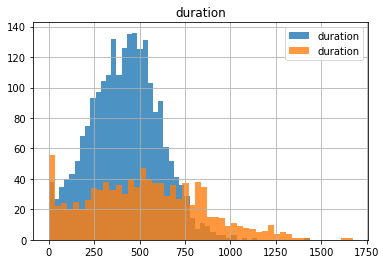

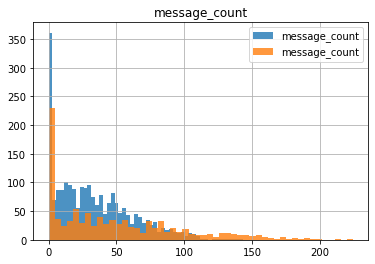

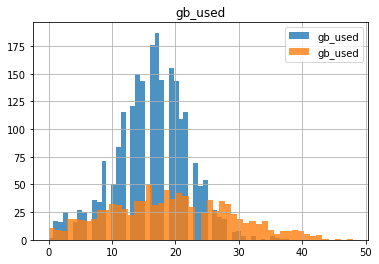

In [26]:
df_pivot = df_totals.pivot_table(index='tariff', values = ['duration', 'message_count', 'gb_used'], aggfunc=['mean', 'median'])
display(df_pivot)
df_smart = df_totals[df_totals.tariff == 'smart']
df_ultra = df_totals[df_totals.tariff == 'ultra']

#df_smart.rename(columns={'duration':'smart_duration', 'message_count':'smart_message_count', 'gb_used':'smart_gb_used'}, inplace=True)
#df_ultra.rename(columns={'duration':'ultra_duration', 'message_count':'ultra_message_count', 'gb_used':'ultra_gb_used'}, inplace=True)

ax = df_smart.hist(['duration'], bins=50, legend=True, alpha=0.8)
df_ultra.hist(['duration'], bins=50, ax=ax, legend=True, alpha=0.8)
#Не смог в легенде вывести различные тарифы

ax = df_smart.hist(['message_count'], bins=50, legend=True, alpha=0.8)
df_ultra.hist(['message_count'], bins=50, ax=ax, legend=True, alpha=0.8)


ax = df_smart.hist(['gb_used'], bins=50, legend=True, alpha=0.8)
df_ultra.hist(['gb_used'], bins=50, ax=ax, legend=True, alpha=0.8)


Видно, что в среднем абонент тарифа "Смарт" расходует 413 мин / мес, использует 16 Гб интернета и отправляет 38 сообщений.
Для тарифа "Ультра" эти цифры составляют 538 мин/мес, 19 Гб и 61 сообщение.
Медианные значения меньше, это означает, что есть существуют абоненты с показателями значительно выше средних по выборке (выборки скошены вправо). Распределение, отдаленно напоминающее нормальное  - звонки по тарифу "Смарт" и расход интернета по тарифу "Ультра"

In [27]:
df_stat = pd.DataFrame(index=['smart', 'ultra'],
            data = {
            'calls_mean':[df_smart['duration'].mean(), df_ultra['duration'].mean()],
            'calls_variance':[np.var(df_smart['duration']), np.var(df_ultra['duration'])],
            'calls_std':[np.std(df_smart['duration']), np.var(df_ultra['duration'])],
                
            'messages_mean':[df_smart['message_count'].mean(), df_ultra['message_count'].mean()],
            'messages_variance':[np.var(df_smart['message_count']), np.var(df_ultra['message_count'])],
            'messages_std':[np.std(df_smart['message_count']), np.var(df_ultra['message_count'])],

            'internet_mean':[df_smart['gb_used'].mean(), df_ultra['gb_used'].mean()],
            'internet_variance':[np.var(df_smart['gb_used']), np.var(df_ultra['gb_used'])],
            'internet_std':[np.std(df_smart['gb_used']), np.var(df_ultra['gb_used'])],
                
            'fee_mean':[df_smart['fee'].mean(), df_ultra['fee'].mean()],

            }
            )
df_stat

,calls_mean,calls_variance,calls_std,messages_mean,messages_variance,messages_std,internet_mean,internet_variance,internet_std,fee_mean
smart,417.934948,36203.066652,190.271035,33.384029,796.455483,28.221543,16.285778,32.855522,5.731974,1283.333782
ultra,526.623350,100771.223617,100771.223617,49.363452,2282.946075,2282.946075,19.181726,93.708092,93.708092,2057.512690


Большинство пользователей не отправляют смс (особенно в тарифе "Смарт"), а также много пропущенных звонков. 
Абоненты тарифа Smart более однородны в использованных минутах звонков и стараются укладываться предоплаченные минуты, но многие выходят за пределы включенных 500 минут. Тогда как пользователи тарифа Ultra более разнообразны в этом отношении, но мало кто выходит за пределы предоплаченных 3000 минут. Аналогично в контексте использования интернета и отправки сообщений: у тарифа "Смарт" более однородная аудитория.

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
Здесь нулевая гипотеза звучит так:
* средняя выручка абонентов тарифов «Ультра» и «Смарт» равна

Альтернативная:
* средняя выручка абонентов тарифа «Ультра» отличается от средней выручки абонентов тарифа «Смарт» (двусторонняя)

In [31]:
#Гипотеза о равенстве средних двух генеральных совокупностей
alpha = .05
results = st.ttest_ind(
    df_smart['fee'], 
    df_ultra['fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.497642503312942e-161
Отвергаем нулевую гипотезу


### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Здесь нулевая гипотеза звучит так:
* средняя выручка от абонентов из Москвы равна средней выручке от абонентов из других регионов 

Альтернативная:
* средняя выручка от абонентов из Москвы отличается от абонентов из других регионов (двусторонняя)

In [29]:
df_totals.columns

Index(['user_id', 'month', 'calls_count', 'duration', 'message_count', 'sum',
       'gb_used', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'gb_per_month_included', 'fee'],
      dtype='object')

In [30]:
df_moscow = (df_totals
                .query('city == "Москва"')
            )
df_other = (df_totals
                .query('city != "Москва"')
            )

#Гипотеза о равенстве средних двух генеральных совокупностей
alpha = .05
results = st.ttest_ind(
    df_moscow['fee'], 
    df_other['fee'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.6026072544084788
Не получилось отвергнуть нулевую гипотезу


## Общий вывод:

Изучили поведение абонентов тарифов "Смарт" и "Ультра" компании сотовой связи "Мегалайн" на ограниченной выборке из 500 пользователей за 2018 год.

Выяснили, что в среднем абонент тарифа "Смарт" расходует 417 мин / мес, использует 16 Гб интернета и отправляет 33 7сообщений. Для тарифа "Ультра" эти цифры составляют 526 мин/мес, 19 Гб и 49 сообщений соответственно. Медианные значения меньше, это означает, что есть существуют абоненты с показателями значительно выше средних по выборке (выборки скошены вправо)

Проверили 2 гипотезы и определили:
1. Есть статистически значимое отличие средней выручки от абонентов тарифов "Смарт" и "Ультра" с уровнем значимости 0.05.
При этом средняя выручка по тарифу "Смарт" составляет 1 283 руб/мес, по тарифу "Ультра" - 2 057
 руб/мес. Исходя из этого маркетингу рекомендуется продвигать тариф "Ультра".

2. На предоставленной выборке отсутствуют данные, чтобы утверждать, что средняя выручка абонентов из Москвы отличается от средней выручки абонентов из регионов.
Исходя из этого усилия по продвижению и в Москве, и в регионах не должны отличаться
